# Neural Networks

Neural networks are the workhorse of modern machine learning algorithms. They are based on how a human brain works and operates. They utilise statistics and derivative mathematics to discover the relationship between inputs and outputs. In this Jupyter Notebook we will explore some of the underlying principles behind how neural networks work and slowly unfold some of the complex mathematics that underpins them.

## Neural Network Topology

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal from one artificial neuron to another. An artificial neuron that receives a signal can process it and then signal additional artificial neurons connected to it. 

There are three key components that make up the neural network, these are the activation function, the weights and biases.
- An activation function is a mathematical function that applies a mathematical formula to all of the inputs into the neuron to produce some (usually non-linear output).
- The weights are the multiplier applied to the connection between neurons that modify the values of the output of one neuron into the input of the next neuron.
- Biases are added or subtracted from neurons to shift the activation function.

These three properties of a neural network can be easily shown in the image below:
![](images/neurons.gif)

## Feed Forward

Before going in depth into how neural networks work, it is important to understand the concept of 'feed forward' in the context of neural networks. To help explain the concept of feed forward, we will use the previous 'students' dataset to find the relationship between exam score 1, 2, and whether they will be admitted or not.

In [509]:
from keras.models import Sequential
from keras.layers import Dense
import keras.utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Like before, we will import the dataset. This time though, we will convert the 'y' field into two categories. This essentially makes two new columns 'Not Admitted' and 'Admitted', so when 'y' was previously a 0 this will now correspond to a 1 in the 'Not Admitted' column.

In [510]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('/aiuoa/datasets/students_1.txt', delimiter=',')

In [511]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))
y = keras.utils.to_categorical(y)
y_shape = y.shape[1]

In [514]:
print(X)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

Below we train a simple categorical neural network on the data given above utilising the sigmoid function that was showcased when looking at the logistic regression example. ![](images/sigmoid.png)

### Simple Network Architecture

In the code below we have declared a neural network that utilises the sigmoid function and only connects the input layer to the output layer. This results in a pretty bad neural network that appears to be no better than flipping a coin to determine whether a student was admitted or not.

In [515]:
model = Sequential()
# Output layer
model.add(Dense(2, activation='sigmoid', input_dim=2))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=5, batch_size=100)

Epoch 1/5
100/100 [==============================] - 1s 12ms/step - loss: 9.5351 - acc: 0.3900
Epoch 2/5
100/100 [==============================] - 0s 26us/step - loss: 9.5345 - acc: 0.3900
Epoch 3/5
100/100 [==============================] - 0s 21us/step - loss: 9.5340 - acc: 0.3900
Epoch 4/5
100/100 [==============================] - 0s 21us/step - loss: 9.5334 - acc: 0.3900
Epoch 5/5
100/100 [==============================] - 0s 18us/step - loss: 9.5329 - acc: 0.3900


We can visualise this neural network using the VisualizeNN script which shows the relationship between the neurons and the weights. (Note this visualisation tool does not show biases).

In [516]:
import VisualizeNN as VisNN

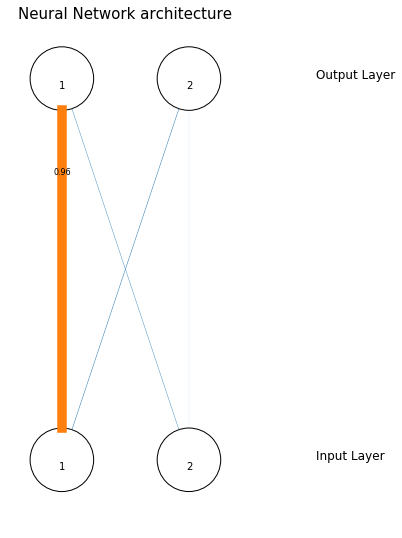

In [517]:
# Draw the Neural Network with weights
network_structure = np.hstack(([X.shape[1]], [y_shape]))
weights = []
for i in range(0, len(model.get_weights())):
    if "bias" not in model.weights[i].name:
        weights.append(model.get_weights()[i])
network = VisNN.DrawNN(network_structure, weights)
network.draw()

In [518]:
model.get_weights()

[array([[ 0.95546013, -0.4832942 ],
        [-0.3864108 , -0.06889641]], dtype=float32),
 array([-0.00497767,  0.        ], dtype=float32)]

### Complex Network Architecture

Now that we have shown that connecting the input straight to the output does not yield promising results, let us intoduce a hidden layer with three neurons to see if we can train this network to find the relationship between the input and output.

In [520]:
model = Sequential()
# Hidden Layer 1
model.add(Dense(3, activation='sigmoid', input_dim=2))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=5000, batch_size=100)

Epoch 1/5000
100/100 [==============================] - 1s 13ms/step - loss: 0.7126 - acc: 0.5000
Epoch 2/5000
100/100 [==============================] - 0s 25us/step - loss: 0.7123 - acc: 0.5000
Epoch 3/5000
100/100 [==============================] - 0s 20us/step - loss: 0.7121 - acc: 0.5000
Epoch 4/5000
100/100 [==============================] - 0s 18us/step - loss: 0.7119 - acc: 0.5000
Epoch 5/5000
100/100 [==============================] - 0s 16us/step - loss: 0.7116 - acc: 0.5000
Epoch 6/5000
100/100 [==============================] - 0s 17us/step - loss: 0.7114 - acc: 0.5000
Epoch 7/5000
100/100 [==============================] - 0s 15us/step - loss: 0.7111 - acc: 0.5000
Epoch 8/5000
100/100 [==============================] - 0s 17us/step - loss: 0.7109 - acc: 0.5000
Epoch 9/5000
100/100 [==============================] - 0s 17us/step - loss: 0.7107 - acc: 0.5000
Epoch 10/5000
100/100 [==============================] - 0s 17us/step - loss: 0.7104 - acc: 0.5000
Epoch 11/5000
100/1

Epoch 84/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6964 - acc: 0.5000
Epoch 85/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6963 - acc: 0.5000
Epoch 86/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6961 - acc: 0.5000
Epoch 87/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6960 - acc: 0.5000
Epoch 88/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6958 - acc: 0.5000
Epoch 89/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6957 - acc: 0.5000
Epoch 90/5000
100/100 [==============================] - 0s 15us/step - loss: 0.6955 - acc: 0.5000
Epoch 91/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6954 - acc: 0.5000
Epoch 92/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6952 - acc: 0.5000
Epoch 93/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6951 - acc: 0.5000
Epoch 94/5

100/100 [==============================] - 0s 26us/step - loss: 0.6867 - acc: 0.5000
Epoch 167/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6866 - acc: 0.5000
Epoch 168/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6865 - acc: 0.5000
Epoch 169/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6864 - acc: 0.5000
Epoch 170/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6864 - acc: 0.5000
Epoch 171/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6863 - acc: 0.5000
Epoch 172/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6862 - acc: 0.5000
Epoch 173/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6861 - acc: 0.5000
Epoch 174/5000
100/100 [==============================] - 0s 28us/step - loss: 0.6860 - acc: 0.5000
Epoch 175/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6859 - acc: 0.5000
Epoch 176/5000


100/100 [==============================] - 0s 25us/step - loss: 0.6807 - acc: 0.6000
Epoch 249/5000
100/100 [==============================] - 0s 37us/step - loss: 0.6806 - acc: 0.6000
Epoch 250/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6805 - acc: 0.6000
Epoch 251/5000
100/100 [==============================] - 0s 38us/step - loss: 0.6805 - acc: 0.6000
Epoch 252/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6804 - acc: 0.6000
Epoch 253/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6804 - acc: 0.6000
Epoch 254/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6803 - acc: 0.6000
Epoch 255/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6803 - acc: 0.6000
Epoch 256/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6802 - acc: 0.6000
Epoch 257/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6802 - acc: 0.6000
Epoch 258/5000


100/100 [==============================] - 0s 25us/step - loss: 0.6769 - acc: 0.6000
Epoch 331/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6769 - acc: 0.6000
Epoch 332/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6768 - acc: 0.6000
Epoch 333/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6767 - acc: 0.6000
Epoch 334/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6766 - acc: 0.6000
Epoch 335/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6764 - acc: 0.6000
Epoch 336/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6763 - acc: 0.6000
Epoch 337/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6761 - acc: 0.6000
Epoch 338/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6760 - acc: 0.6000
Epoch 339/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6758 - acc: 0.6000
Epoch 340/5000


Epoch 413/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6678 - acc: 0.6000
Epoch 414/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6677 - acc: 0.6000
Epoch 415/5000
100/100 [==============================] - 0s 28us/step - loss: 0.6677 - acc: 0.6000
Epoch 416/5000
100/100 [==============================] - 0s 28us/step - loss: 0.6676 - acc: 0.6000
Epoch 417/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6675 - acc: 0.6000
Epoch 418/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6675 - acc: 0.6000
Epoch 419/5000
100/100 [==============================] - 0s 54us/step - loss: 0.6674 - acc: 0.6000
Epoch 420/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6674 - acc: 0.6000
Epoch 421/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6673 - acc: 0.6000
Epoch 422/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6672 - acc: 0.6000


Epoch 495/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6612 - acc: 0.6150
Epoch 496/5000
100/100 [==============================] - 0s 32us/step - loss: 0.6611 - acc: 0.6150
Epoch 497/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6610 - acc: 0.6150
Epoch 498/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6610 - acc: 0.6150
Epoch 499/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6609 - acc: 0.6150
Epoch 500/5000
100/100 [==============================] - 0s 36us/step - loss: 0.6608 - acc: 0.6150
Epoch 501/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6607 - acc: 0.6150
Epoch 502/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6606 - acc: 0.6150
Epoch 503/5000
100/100 [==============================] - 0s 46us/step - loss: 0.6605 - acc: 0.6150
Epoch 504/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6605 - acc: 0.6150


Epoch 577/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6552 - acc: 0.6350
Epoch 578/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6551 - acc: 0.6350
Epoch 579/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6550 - acc: 0.6350
Epoch 580/5000
100/100 [==============================] - 0s 57us/step - loss: 0.6550 - acc: 0.6350
Epoch 581/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6549 - acc: 0.6350
Epoch 582/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6548 - acc: 0.6350
Epoch 583/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6548 - acc: 0.6350
Epoch 584/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6547 - acc: 0.6350
Epoch 585/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6547 - acc: 0.6350
Epoch 586/5000
100/100 [==============================] - 0s 15us/step - loss: 0.6546 - acc: 0.6350


Epoch 659/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6505 - acc: 0.6450
Epoch 660/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6504 - acc: 0.6450
Epoch 661/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6503 - acc: 0.6450
Epoch 662/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6503 - acc: 0.6450
Epoch 663/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6502 - acc: 0.6450
Epoch 664/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6502 - acc: 0.6450
Epoch 665/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6501 - acc: 0.6450
Epoch 666/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6501 - acc: 0.6450
Epoch 667/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6500 - acc: 0.6450
Epoch 668/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6500 - acc: 0.6450


Epoch 741/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6464 - acc: 0.6450
Epoch 742/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6463 - acc: 0.6450
Epoch 743/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6463 - acc: 0.6450
Epoch 744/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6463 - acc: 0.6450
Epoch 745/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6462 - acc: 0.6450
Epoch 746/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6462 - acc: 0.6450
Epoch 747/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6461 - acc: 0.6450
Epoch 748/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6461 - acc: 0.6450
Epoch 749/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6460 - acc: 0.6450
Epoch 750/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6460 - acc: 0.6450


Epoch 823/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6426 - acc: 0.6500
Epoch 824/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6426 - acc: 0.6500
Epoch 825/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6425 - acc: 0.6500
Epoch 826/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6425 - acc: 0.6500
Epoch 827/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6424 - acc: 0.6500
Epoch 828/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6424 - acc: 0.6500
Epoch 829/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6424 - acc: 0.6500
Epoch 830/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6423 - acc: 0.6500
Epoch 831/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6423 - acc: 0.6500
Epoch 832/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6422 - acc: 0.6500


Epoch 905/5000
100/100 [==============================] - 0s 18us/step - loss: 0.6389 - acc: 0.6500
Epoch 906/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6389 - acc: 0.6500
Epoch 907/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6388 - acc: 0.6500
Epoch 908/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6388 - acc: 0.6500
Epoch 909/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6388 - acc: 0.6500
Epoch 910/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6387 - acc: 0.6500
Epoch 911/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6387 - acc: 0.6500
Epoch 912/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6386 - acc: 0.6500
Epoch 913/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6386 - acc: 0.6500
Epoch 914/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6385 - acc: 0.6500


Epoch 987/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6351 - acc: 0.6550
Epoch 988/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6350 - acc: 0.6550
Epoch 989/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6350 - acc: 0.6550
Epoch 990/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6349 - acc: 0.6550
Epoch 991/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6349 - acc: 0.6550
Epoch 992/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6348 - acc: 0.6550
Epoch 993/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6348 - acc: 0.6550
Epoch 994/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6347 - acc: 0.6550
Epoch 995/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6346 - acc: 0.6550
Epoch 996/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6346 - acc: 0.6550


Epoch 1069/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6294 - acc: 0.6300
Epoch 1070/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6294 - acc: 0.6300
Epoch 1071/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6293 - acc: 0.6300
Epoch 1072/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6292 - acc: 0.6300
Epoch 1073/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6291 - acc: 0.6300
Epoch 1074/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6291 - acc: 0.6300
Epoch 1075/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6290 - acc: 0.6300
Epoch 1076/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6289 - acc: 0.6300
Epoch 1077/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6288 - acc: 0.6300
Epoch 1078/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6288 - ac

100/100 [==============================] - 0s 25us/step - loss: 0.6234 - acc: 0.6250
Epoch 1151/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6233 - acc: 0.6250
Epoch 1152/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6232 - acc: 0.6250
Epoch 1153/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6231 - acc: 0.6250
Epoch 1154/5000
100/100 [==============================] - 0s 13us/step - loss: 0.6231 - acc: 0.6250
Epoch 1155/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6230 - acc: 0.6250
Epoch 1156/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6229 - acc: 0.6250
Epoch 1157/5000
100/100 [==============================] - 0s 15us/step - loss: 0.6228 - acc: 0.6250
Epoch 1158/5000
100/100 [==============================] - 0s 15us/step - loss: 0.6228 - acc: 0.6250
Epoch 1159/5000
100/100 [==============================] - 0s 29us/step - loss: 0.6227 - acc: 0.6250
Epoch 

Epoch 1232/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6171 - acc: 0.6350
Epoch 1233/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6170 - acc: 0.6350
Epoch 1234/5000
100/100 [==============================] - 0s 20us/step - loss: 0.6169 - acc: 0.6350
Epoch 1235/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6169 - acc: 0.6350
Epoch 1236/5000
100/100 [==============================] - 0s 23us/step - loss: 0.6168 - acc: 0.6350
Epoch 1237/5000
100/100 [==============================] - 0s 15us/step - loss: 0.6167 - acc: 0.6350
Epoch 1238/5000
100/100 [==============================] - 0s 30us/step - loss: 0.6166 - acc: 0.6350
Epoch 1239/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6166 - acc: 0.6350
Epoch 1240/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6165 - acc: 0.6350
Epoch 1241/5000
100/100 [==============================] - 0s 19us/step - loss: 0.6164 - ac

100/100 [==============================] - 0s 23us/step - loss: 0.6107 - acc: 0.6400
Epoch 1314/5000
100/100 [==============================] - 0s 27us/step - loss: 0.6106 - acc: 0.6450
Epoch 1315/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6106 - acc: 0.6450
Epoch 1316/5000
100/100 [==============================] - 0s 36us/step - loss: 0.6105 - acc: 0.6450
Epoch 1317/5000
100/100 [==============================] - 0s 51us/step - loss: 0.6104 - acc: 0.6450
Epoch 1318/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6103 - acc: 0.6450
Epoch 1319/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6102 - acc: 0.6450
Epoch 1320/5000
100/100 [==============================] - 0s 46us/step - loss: 0.6102 - acc: 0.6500
Epoch 1321/5000
100/100 [==============================] - 0s 17us/step - loss: 0.6101 - acc: 0.6500
Epoch 1322/5000
100/100 [==============================] - 0s 21us/step - loss: 0.6100 - acc: 0.6500
Epoch 

Epoch 1395/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6041 - acc: 0.6650
Epoch 1396/5000
100/100 [==============================] - 0s 13us/step - loss: 0.6040 - acc: 0.6650
Epoch 1397/5000
100/100 [==============================] - 0s 24us/step - loss: 0.6039 - acc: 0.6650
Epoch 1398/5000
100/100 [==============================] - 0s 22us/step - loss: 0.6039 - acc: 0.6650
Epoch 1399/5000
100/100 [==============================] - 0s 25us/step - loss: 0.6038 - acc: 0.6650
Epoch 1400/5000
100/100 [==============================] - 0s 13us/step - loss: 0.6037 - acc: 0.6650
Epoch 1401/5000
100/100 [==============================] - 0s 14us/step - loss: 0.6036 - acc: 0.6650
Epoch 1402/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6035 - acc: 0.6650
Epoch 1403/5000
100/100 [==============================] - 0s 26us/step - loss: 0.6034 - acc: 0.6650
Epoch 1404/5000
100/100 [==============================] - 0s 16us/step - loss: 0.6034 - ac

Epoch 1477/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5973 - acc: 0.6700
Epoch 1478/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5972 - acc: 0.6700
Epoch 1479/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5971 - acc: 0.6700
Epoch 1480/5000
100/100 [==============================] - 0s 37us/step - loss: 0.5971 - acc: 0.6700
Epoch 1481/5000
100/100 [==============================] - 0s 17us/step - loss: 0.5970 - acc: 0.6700
Epoch 1482/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5969 - acc: 0.6700
Epoch 1483/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5968 - acc: 0.6700
Epoch 1484/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5967 - acc: 0.6700
Epoch 1485/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5966 - acc: 0.6700
Epoch 1486/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5966 - ac

100/100 [==============================] - 0s 24us/step - loss: 0.5905 - acc: 0.6700
Epoch 1559/5000
100/100 [==============================] - 0s 27us/step - loss: 0.5904 - acc: 0.6700
Epoch 1560/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5903 - acc: 0.6750
Epoch 1561/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5902 - acc: 0.6700
Epoch 1562/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5901 - acc: 0.6700
Epoch 1563/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5900 - acc: 0.6750
Epoch 1564/5000
100/100 [==============================] - 0s 17us/step - loss: 0.5899 - acc: 0.6700
Epoch 1565/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5899 - acc: 0.6750
Epoch 1566/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5898 - acc: 0.6750
Epoch 1567/5000
100/100 [==============================] - 0s 17us/step - loss: 0.5897 - acc: 0.6700
Epoch 

Epoch 1640/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5834 - acc: 0.6850
Epoch 1641/5000
100/100 [==============================] - 0s 53us/step - loss: 0.5833 - acc: 0.6850
Epoch 1642/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5832 - acc: 0.6850
Epoch 1643/5000
100/100 [==============================] - 0s 33us/step - loss: 0.5831 - acc: 0.6850
Epoch 1644/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5830 - acc: 0.6850
Epoch 1645/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5829 - acc: 0.6850
Epoch 1646/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5828 - acc: 0.6850
Epoch 1647/5000
100/100 [==============================] - 0s 36us/step - loss: 0.5828 - acc: 0.6850
Epoch 1648/5000
100/100 [==============================] - 0s 16us/step - loss: 0.5827 - acc: 0.6850
Epoch 1649/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5826 - ac

100/100 [==============================] - 0s 33us/step - loss: 0.5763 - acc: 0.6850
Epoch 1722/5000
100/100 [==============================] - 0s 43us/step - loss: 0.5762 - acc: 0.6850
Epoch 1723/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5761 - acc: 0.6850
Epoch 1724/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5760 - acc: 0.6850
Epoch 1725/5000
100/100 [==============================] - 0s 36us/step - loss: 0.5759 - acc: 0.6850
Epoch 1726/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5758 - acc: 0.6850
Epoch 1727/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5757 - acc: 0.6850
Epoch 1728/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5756 - acc: 0.6850
Epoch 1729/5000
100/100 [==============================] - 0s 37us/step - loss: 0.5755 - acc: 0.6850
Epoch 1730/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5755 - acc: 0.6850
Epoch 

Epoch 1803/5000
100/100 [==============================] - 0s 27us/step - loss: 0.5689 - acc: 0.6900
Epoch 1804/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5688 - acc: 0.6900
Epoch 1805/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5688 - acc: 0.6900
Epoch 1806/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5687 - acc: 0.6900
Epoch 1807/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5686 - acc: 0.6900
Epoch 1808/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5685 - acc: 0.6950
Epoch 1809/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5684 - acc: 0.6950
Epoch 1810/5000
100/100 [==============================] - 0s 27us/step - loss: 0.5683 - acc: 0.6950
Epoch 1811/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5682 - acc: 0.6950
Epoch 1812/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5681 - ac

100/100 [==============================] - 0s 19us/step - loss: 0.5616 - acc: 0.7000
Epoch 1885/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5615 - acc: 0.7000
Epoch 1886/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5614 - acc: 0.7000
Epoch 1887/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5613 - acc: 0.7000
Epoch 1888/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5613 - acc: 0.7000
Epoch 1889/5000
100/100 [==============================] - 0s 16us/step - loss: 0.5612 - acc: 0.7000
Epoch 1890/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5611 - acc: 0.7000
Epoch 1891/5000
100/100 [==============================] - 0s 33us/step - loss: 0.5610 - acc: 0.7000
Epoch 1892/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5609 - acc: 0.7000
Epoch 1893/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5608 - acc: 0.7000
Epoch 

Epoch 1966/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5541 - acc: 0.7100
Epoch 1967/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5540 - acc: 0.7100
Epoch 1968/5000
100/100 [==============================] - 0s 33us/step - loss: 0.5539 - acc: 0.7100
Epoch 1969/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5538 - acc: 0.7100
Epoch 1970/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5538 - acc: 0.7100
Epoch 1971/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5537 - acc: 0.7100
Epoch 1972/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5536 - acc: 0.7100
Epoch 1973/5000
100/100 [==============================] - 0s 31us/step - loss: 0.5535 - acc: 0.7100
Epoch 1974/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5534 - acc: 0.7100
Epoch 1975/5000
100/100 [==============================] - 0s 27us/step - loss: 0.5533 - ac

100/100 [==============================] - 0s 34us/step - loss: 0.5467 - acc: 0.7350
Epoch 2048/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5466 - acc: 0.7300
Epoch 2049/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5465 - acc: 0.7350
Epoch 2050/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5464 - acc: 0.7350
Epoch 2051/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5463 - acc: 0.7350
Epoch 2052/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5462 - acc: 0.7350
Epoch 2053/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5461 - acc: 0.7350
Epoch 2054/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5460 - acc: 0.7350
Epoch 2055/5000
100/100 [==============================] - 0s 30us/step - loss: 0.5459 - acc: 0.7350
Epoch 2056/5000
100/100 [==============================] - 0s 31us/step - loss: 0.5458 - acc: 0.7350
Epoch 

Epoch 2129/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5391 - acc: 0.7400
Epoch 2130/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5390 - acc: 0.7400
Epoch 2131/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5389 - acc: 0.7400
Epoch 2132/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5388 - acc: 0.7400
Epoch 2133/5000
100/100 [==============================] - 0s 16us/step - loss: 0.5387 - acc: 0.7400
Epoch 2134/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5386 - acc: 0.7400
Epoch 2135/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5385 - acc: 0.7400
Epoch 2136/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5384 - acc: 0.7400
Epoch 2137/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5383 - acc: 0.7400
Epoch 2138/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5382 - ac

100/100 [==============================] - 0s 24us/step - loss: 0.5315 - acc: 0.7400
Epoch 2211/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5314 - acc: 0.7400
Epoch 2212/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5313 - acc: 0.7400
Epoch 2213/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5312 - acc: 0.7400
Epoch 2214/5000
100/100 [==============================] - 0s 19us/step - loss: 0.5311 - acc: 0.7400
Epoch 2215/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5310 - acc: 0.7400
Epoch 2216/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5310 - acc: 0.7400
Epoch 2217/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5309 - acc: 0.7400
Epoch 2218/5000
100/100 [==============================] - 0s 26us/step - loss: 0.5308 - acc: 0.7400
Epoch 2219/5000
100/100 [==============================] - 0s 34us/step - loss: 0.5307 - acc: 0.7400
Epoch 

Epoch 2292/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5238 - acc: 0.7450
Epoch 2293/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5238 - acc: 0.7450
Epoch 2294/5000
100/100 [==============================] - 0s 29us/step - loss: 0.5237 - acc: 0.7450
Epoch 2295/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5236 - acc: 0.7450
Epoch 2296/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5235 - acc: 0.7450
Epoch 2297/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5234 - acc: 0.7450
Epoch 2298/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5233 - acc: 0.7450
Epoch 2299/5000
100/100 [==============================] - 0s 17us/step - loss: 0.5232 - acc: 0.7450
Epoch 2300/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5231 - acc: 0.7450
Epoch 2301/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5230 - ac

100/100 [==============================] - 0s 22us/step - loss: 0.5163 - acc: 0.7600
Epoch 2374/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5162 - acc: 0.7600
Epoch 2375/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5161 - acc: 0.7600
Epoch 2376/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5160 - acc: 0.7600
Epoch 2377/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5159 - acc: 0.7600
Epoch 2378/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5158 - acc: 0.7600
Epoch 2379/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5157 - acc: 0.7600
Epoch 2380/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5156 - acc: 0.7600
Epoch 2381/5000
100/100 [==============================] - 0s 20us/step - loss: 0.5155 - acc: 0.7600
Epoch 2382/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5154 - acc: 0.7600
Epoch 

Epoch 2455/5000
100/100 [==============================] - 0s 23us/step - loss: 0.5086 - acc: 0.7800
Epoch 2456/5000
100/100 [==============================] - 0s 15us/step - loss: 0.5085 - acc: 0.7800
Epoch 2457/5000
100/100 [==============================] - 0s 24us/step - loss: 0.5084 - acc: 0.7800
Epoch 2458/5000
100/100 [==============================] - 0s 18us/step - loss: 0.5083 - acc: 0.7800
Epoch 2459/5000
100/100 [==============================] - 0s 17us/step - loss: 0.5083 - acc: 0.7800
Epoch 2460/5000
100/100 [==============================] - 0s 25us/step - loss: 0.5082 - acc: 0.7800
Epoch 2461/5000
100/100 [==============================] - 0s 28us/step - loss: 0.5081 - acc: 0.7800
Epoch 2462/5000
100/100 [==============================] - 0s 21us/step - loss: 0.5080 - acc: 0.7800
Epoch 2463/5000
100/100 [==============================] - 0s 14us/step - loss: 0.5079 - acc: 0.7800
Epoch 2464/5000
100/100 [==============================] - 0s 22us/step - loss: 0.5078 - ac

100/100 [==============================] - 0s 43us/step - loss: 0.5011 - acc: 0.7850
Epoch 2537/5000
100/100 [==============================] - 0s 41us/step - loss: 0.5010 - acc: 0.7850
Epoch 2538/5000
100/100 [==============================] - 0s 48us/step - loss: 0.5009 - acc: 0.7850
Epoch 2539/5000
100/100 [==============================] - 0s 43us/step - loss: 0.5008 - acc: 0.7850
Epoch 2540/5000
100/100 [==============================] - 0s 47us/step - loss: 0.5007 - acc: 0.7850
Epoch 2541/5000
100/100 [==============================] - 0s 40us/step - loss: 0.5006 - acc: 0.7850
Epoch 2542/5000
100/100 [==============================] - 0s 27us/step - loss: 0.5005 - acc: 0.7850
Epoch 2543/5000
100/100 [==============================] - 0s 55us/step - loss: 0.5004 - acc: 0.7850
Epoch 2544/5000
100/100 [==============================] - 0s 47us/step - loss: 0.5004 - acc: 0.7850
Epoch 2545/5000
100/100 [==============================] - 0s 39us/step - loss: 0.5003 - acc: 0.7850
Epoch 

Epoch 2618/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4935 - acc: 0.7900
Epoch 2619/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4934 - acc: 0.7900
Epoch 2620/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4933 - acc: 0.7900
Epoch 2621/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4932 - acc: 0.7900
Epoch 2622/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4931 - acc: 0.7900
Epoch 2623/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4930 - acc: 0.7900
Epoch 2624/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4930 - acc: 0.7900
Epoch 2625/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4929 - acc: 0.7900
Epoch 2626/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4928 - acc: 0.7900
Epoch 2627/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4927 - ac

Epoch 2700/5000
100/100 [==============================] - 0s 23us/step - loss: 0.4860 - acc: 0.7950
Epoch 2701/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4859 - acc: 0.7950
Epoch 2702/5000
100/100 [==============================] - 0s 31us/step - loss: 0.4858 - acc: 0.7950
Epoch 2703/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4857 - acc: 0.7950
Epoch 2704/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4856 - acc: 0.7950
Epoch 2705/5000
100/100 [==============================] - 0s 39us/step - loss: 0.4855 - acc: 0.7950
Epoch 2706/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4854 - acc: 0.7950
Epoch 2707/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4853 - acc: 0.7950
Epoch 2708/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4852 - acc: 0.7950
Epoch 2709/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4851 - ac

100/100 [==============================] - 0s 22us/step - loss: 0.4786 - acc: 0.7950
Epoch 2782/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4785 - acc: 0.7950
Epoch 2783/5000
100/100 [==============================] - 0s 23us/step - loss: 0.4784 - acc: 0.7950
Epoch 2784/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4783 - acc: 0.7950
Epoch 2785/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4782 - acc: 0.7950
Epoch 2786/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4781 - acc: 0.7950
Epoch 2787/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4780 - acc: 0.7950
Epoch 2788/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4779 - acc: 0.7950
Epoch 2789/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4778 - acc: 0.7950
Epoch 2790/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4778 - acc: 0.7950
Epoch 

Epoch 2863/5000
100/100 [==============================] - 0s 20us/step - loss: 0.4712 - acc: 0.8000
Epoch 2864/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4711 - acc: 0.8000
Epoch 2865/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4710 - acc: 0.8000
Epoch 2866/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4709 - acc: 0.8000
Epoch 2867/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4708 - acc: 0.8000
Epoch 2868/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4707 - acc: 0.8000
Epoch 2869/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4706 - acc: 0.8000
Epoch 2870/5000
100/100 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.8000
Epoch 2871/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4704 - acc: 0.8000
Epoch 2872/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4703 - ac

100/100 [==============================] - 0s 16us/step - loss: 0.4639 - acc: 0.8100
Epoch 2945/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4638 - acc: 0.8100
Epoch 2946/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4637 - acc: 0.8100
Epoch 2947/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4636 - acc: 0.8100
Epoch 2948/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4635 - acc: 0.8100
Epoch 2949/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4635 - acc: 0.8100
Epoch 2950/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4634 - acc: 0.8100
Epoch 2951/5000
100/100 [==============================] - 0s 65us/step - loss: 0.4633 - acc: 0.8100
Epoch 2952/5000
100/100 [==============================] - 0s 41us/step - loss: 0.4632 - acc: 0.8100
Epoch 2953/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4631 - acc: 0.8100
Epoch 

Epoch 3026/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4566 - acc: 0.8300
Epoch 3027/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4566 - acc: 0.8300
Epoch 3028/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4565 - acc: 0.8300
Epoch 3029/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4564 - acc: 0.8300
Epoch 3030/5000
100/100 [==============================] - 0s 39us/step - loss: 0.4563 - acc: 0.8300
Epoch 3031/5000
100/100 [==============================] - 0s 35us/step - loss: 0.4562 - acc: 0.8300
Epoch 3032/5000
100/100 [==============================] - 0s 35us/step - loss: 0.4561 - acc: 0.8300
Epoch 3033/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4560 - acc: 0.8300
Epoch 3034/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4559 - acc: 0.8300
Epoch 3035/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4559 - ac

100/100 [==============================] - 0s 23us/step - loss: 0.4496 - acc: 0.8600
Epoch 3108/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4495 - acc: 0.8600
Epoch 3109/5000
100/100 [==============================] - 0s 34us/step - loss: 0.4494 - acc: 0.8600
Epoch 3110/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4493 - acc: 0.8600
Epoch 3111/5000
100/100 [==============================] - 0s 27us/step - loss: 0.4492 - acc: 0.8600
Epoch 3112/5000
100/100 [==============================] - 0s 23us/step - loss: 0.4491 - acc: 0.8600
Epoch 3113/5000
100/100 [==============================] - 0s 23us/step - loss: 0.4490 - acc: 0.8600
Epoch 3114/5000
100/100 [==============================] - 0s 21us/step - loss: 0.4490 - acc: 0.8600
Epoch 3115/5000
100/100 [==============================] - 0s 28us/step - loss: 0.4489 - acc: 0.8600
Epoch 3116/5000
100/100 [==============================] - 0s 27us/step - loss: 0.4488 - acc: 0.8600
Epoch 

Epoch 3189/5000
100/100 [==============================] - 0s 30us/step - loss: 0.4425 - acc: 0.8650
Epoch 3190/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4424 - acc: 0.8650
Epoch 3191/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4423 - acc: 0.8600
Epoch 3192/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4422 - acc: 0.8650
Epoch 3193/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4421 - acc: 0.8650
Epoch 3194/5000
100/100 [==============================] - 0s 32us/step - loss: 0.4421 - acc: 0.8650
Epoch 3195/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4420 - acc: 0.8650
Epoch 3196/5000
100/100 [==============================] - 0s 35us/step - loss: 0.4419 - acc: 0.8600
Epoch 3197/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4418 - acc: 0.8650
Epoch 3198/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4417 - ac

100/100 [==============================] - 0s 20us/step - loss: 0.4356 - acc: 0.8700
Epoch 3271/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4355 - acc: 0.8700
Epoch 3272/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4354 - acc: 0.8700
Epoch 3273/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4353 - acc: 0.8700
Epoch 3274/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4353 - acc: 0.8700
Epoch 3275/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4352 - acc: 0.8700
Epoch 3276/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4351 - acc: 0.8700
Epoch 3277/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4350 - acc: 0.8700
Epoch 3278/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4349 - acc: 0.8700
Epoch 3279/5000
100/100 [==============================] - 0s 20us/step - loss: 0.4348 - acc: 0.8700
Epoch 

Epoch 3352/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4287 - acc: 0.8750
Epoch 3353/5000
100/100 [==============================] - 0s 28us/step - loss: 0.4286 - acc: 0.8750
Epoch 3354/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4286 - acc: 0.8750
Epoch 3355/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4285 - acc: 0.8750
Epoch 3356/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4284 - acc: 0.8750
Epoch 3357/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4283 - acc: 0.8750
Epoch 3358/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4282 - acc: 0.8750
Epoch 3359/5000
100/100 [==============================] - 0s 30us/step - loss: 0.4281 - acc: 0.8750
Epoch 3360/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4281 - acc: 0.8750
Epoch 3361/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4280 - ac

100/100 [==============================] - 0s 18us/step - loss: 0.4220 - acc: 0.8800
Epoch 3434/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4220 - acc: 0.8800
Epoch 3435/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4219 - acc: 0.8800
Epoch 3436/5000
100/100 [==============================] - 0s 20us/step - loss: 0.4218 - acc: 0.8800
Epoch 3437/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4217 - acc: 0.8800
Epoch 3438/5000
100/100 [==============================] - 0s 24us/step - loss: 0.4216 - acc: 0.8800
Epoch 3439/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4216 - acc: 0.8800
Epoch 3440/5000
100/100 [==============================] - 0s 25us/step - loss: 0.4215 - acc: 0.8800
Epoch 3441/5000
100/100 [==============================] - 0s 22us/step - loss: 0.4214 - acc: 0.8800
Epoch 3442/5000
100/100 [==============================] - 0s 28us/step - loss: 0.4213 - acc: 0.8800
Epoch 

Epoch 3515/5000
100/100 [==============================] - 0s 27us/step - loss: 0.4154 - acc: 0.9050
Epoch 3516/5000
100/100 [==============================] - 0s 29us/step - loss: 0.4153 - acc: 0.9050
Epoch 3517/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4152 - acc: 0.9050
Epoch 3518/5000
100/100 [==============================] - 0s 28us/step - loss: 0.4152 - acc: 0.9050
Epoch 3519/5000
100/100 [==============================] - 0s 20us/step - loss: 0.4151 - acc: 0.9050
Epoch 3520/5000
100/100 [==============================] - 0s 28us/step - loss: 0.4150 - acc: 0.9050
Epoch 3521/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4149 - acc: 0.9050
Epoch 3522/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4148 - acc: 0.9050
Epoch 3523/5000
100/100 [==============================] - 0s 20us/step - loss: 0.4147 - acc: 0.9050
Epoch 3524/5000
100/100 [==============================] - 0s 27us/step - loss: 0.4147 - ac

100/100 [==============================] - 0s 19us/step - loss: 0.4089 - acc: 0.9050
Epoch 3597/5000
100/100 [==============================] - 0s 26us/step - loss: 0.4089 - acc: 0.9050
Epoch 3598/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4088 - acc: 0.9050
Epoch 3599/5000
100/100 [==============================] - 0s 27us/step - loss: 0.4087 - acc: 0.9050
Epoch 3600/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4086 - acc: 0.9050
Epoch 3601/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4085 - acc: 0.9050
Epoch 3602/5000
100/100 [==============================] - 0s 31us/step - loss: 0.4085 - acc: 0.9050
Epoch 3603/5000
100/100 [==============================] - 0s 17us/step - loss: 0.4084 - acc: 0.9050
Epoch 3604/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4083 - acc: 0.9050
Epoch 3605/5000
100/100 [==============================] - 0s 30us/step - loss: 0.4082 - acc: 0.9050
Epoch 

Epoch 3678/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4025 - acc: 0.9000
Epoch 3679/5000
100/100 [==============================] - 0s 19us/step - loss: 0.4024 - acc: 0.9000
Epoch 3680/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4024 - acc: 0.9000
Epoch 3681/5000
100/100 [==============================] - 0s 33us/step - loss: 0.4023 - acc: 0.9050
Epoch 3682/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4022 - acc: 0.9000
Epoch 3683/5000
100/100 [==============================] - 0s 16us/step - loss: 0.4021 - acc: 0.9050
Epoch 3684/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4020 - acc: 0.9050
Epoch 3685/5000
100/100 [==============================] - 0s 14us/step - loss: 0.4020 - acc: 0.9000
Epoch 3686/5000
100/100 [==============================] - 0s 15us/step - loss: 0.4019 - acc: 0.9050
Epoch 3687/5000
100/100 [==============================] - 0s 18us/step - loss: 0.4018 - ac

100/100 [==============================] - 0s 28us/step - loss: 0.3963 - acc: 0.9050
Epoch 3760/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3962 - acc: 0.9050
Epoch 3761/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3961 - acc: 0.9050
Epoch 3762/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3960 - acc: 0.9050
Epoch 3763/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3960 - acc: 0.9050
Epoch 3764/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3959 - acc: 0.9050
Epoch 3765/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3958 - acc: 0.9050
Epoch 3766/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3957 - acc: 0.9050
Epoch 3767/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3957 - acc: 0.9050
Epoch 3768/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3956 - acc: 0.9050
Epoch 

Epoch 3841/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3901 - acc: 0.9050
Epoch 3842/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3900 - acc: 0.9050
Epoch 3843/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3899 - acc: 0.9050
Epoch 3844/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3899 - acc: 0.9050
Epoch 3845/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3898 - acc: 0.9050
Epoch 3846/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3897 - acc: 0.9050
Epoch 3847/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3896 - acc: 0.9050
Epoch 3848/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3896 - acc: 0.9050
Epoch 3849/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3895 - acc: 0.9050
Epoch 3850/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3894 - ac

100/100 [==============================] - 0s 19us/step - loss: 0.3841 - acc: 0.9100
Epoch 3923/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3840 - acc: 0.9100
Epoch 3924/5000
100/100 [==============================] - 0s 32us/step - loss: 0.3839 - acc: 0.9100
Epoch 3925/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3839 - acc: 0.9100
Epoch 3926/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3838 - acc: 0.9100
Epoch 3927/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3837 - acc: 0.9100
Epoch 3928/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3836 - acc: 0.9100
Epoch 3929/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3836 - acc: 0.9100
Epoch 3930/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3835 - acc: 0.9100
Epoch 3931/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3834 - acc: 0.9100
Epoch 

Epoch 4004/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3781 - acc: 0.9100
Epoch 4005/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3780 - acc: 0.9100
Epoch 4006/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3780 - acc: 0.9100
Epoch 4007/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3779 - acc: 0.9100
Epoch 4008/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3778 - acc: 0.9100
Epoch 4009/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3778 - acc: 0.9100
Epoch 4010/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3777 - acc: 0.9100
Epoch 4011/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3776 - acc: 0.9100
Epoch 4012/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3775 - acc: 0.9100
Epoch 4013/5000
100/100 [==============================] - 0s 31us/step - loss: 0.3775 - ac

100/100 [==============================] - 0s 21us/step - loss: 0.3723 - acc: 0.9100
Epoch 4086/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3723 - acc: 0.9100
Epoch 4087/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3722 - acc: 0.9100
Epoch 4088/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3721 - acc: 0.9150
Epoch 4089/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3721 - acc: 0.9100
Epoch 4090/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3720 - acc: 0.9150
Epoch 4091/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3719 - acc: 0.9150
Epoch 4092/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3719 - acc: 0.9100
Epoch 4093/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3718 - acc: 0.9150
Epoch 4094/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3717 - acc: 0.9100
Epoch 

Epoch 4167/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3666 - acc: 0.9200
Epoch 4168/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3666 - acc: 0.9200
Epoch 4169/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3665 - acc: 0.9200
Epoch 4170/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3664 - acc: 0.9200
Epoch 4171/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3663 - acc: 0.9200
Epoch 4172/5000
100/100 [==============================] - 0s 25us/step - loss: 0.3663 - acc: 0.9200
Epoch 4173/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3662 - acc: 0.9200
Epoch 4174/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3661 - acc: 0.9200
Epoch 4175/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3661 - acc: 0.9200
Epoch 4176/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3660 - ac

100/100 [==============================] - 0s 17us/step - loss: 0.3611 - acc: 0.9200
Epoch 4249/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3610 - acc: 0.9200
Epoch 4250/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3609 - acc: 0.9200
Epoch 4251/5000
100/100 [==============================] - 0s 22us/step - loss: 0.3609 - acc: 0.9200
Epoch 4252/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3608 - acc: 0.9200
Epoch 4253/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3607 - acc: 0.9200
Epoch 4254/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3607 - acc: 0.9200
Epoch 4255/5000
100/100 [==============================] - 0s 31us/step - loss: 0.3606 - acc: 0.9200
Epoch 4256/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3605 - acc: 0.9200
Epoch 4257/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3605 - acc: 0.9150
Epoch 

Epoch 4330/5000
100/100 [==============================] - 0s 25us/step - loss: 0.3556 - acc: 0.9150
Epoch 4331/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3555 - acc: 0.9150
Epoch 4332/5000
100/100 [==============================] - 0s 15us/step - loss: 0.3555 - acc: 0.9150
Epoch 4333/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3554 - acc: 0.9150
Epoch 4334/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3553 - acc: 0.9150
Epoch 4335/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3553 - acc: 0.9150
Epoch 4336/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3552 - acc: 0.9150
Epoch 4337/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3551 - acc: 0.9150
Epoch 4338/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3551 - acc: 0.9150
Epoch 4339/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3550 - ac

100/100 [==============================] - 0s 27us/step - loss: 0.3503 - acc: 0.9250
Epoch 4412/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3502 - acc: 0.9250
Epoch 4413/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3501 - acc: 0.9250
Epoch 4414/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3501 - acc: 0.9250
Epoch 4415/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3500 - acc: 0.9250
Epoch 4416/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3499 - acc: 0.9250
Epoch 4417/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3499 - acc: 0.9250
Epoch 4418/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3498 - acc: 0.9250
Epoch 4419/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3497 - acc: 0.9250
Epoch 4420/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3497 - acc: 0.9250
Epoch 

Epoch 4493/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3450 - acc: 0.9350
Epoch 4494/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3449 - acc: 0.9300
Epoch 4495/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3449 - acc: 0.9350
Epoch 4496/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3448 - acc: 0.9300
Epoch 4497/5000
100/100 [==============================] - 0s 22us/step - loss: 0.3447 - acc: 0.9300
Epoch 4498/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3447 - acc: 0.9350
Epoch 4499/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3446 - acc: 0.9300
Epoch 4500/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3446 - acc: 0.9350
Epoch 4501/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3445 - acc: 0.9300
Epoch 4502/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3444 - ac

100/100 [==============================] - 0s 21us/step - loss: 0.3399 - acc: 0.9300
Epoch 4575/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3398 - acc: 0.9300
Epoch 4576/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3398 - acc: 0.9300
Epoch 4577/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3397 - acc: 0.9300
Epoch 4578/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3397 - acc: 0.9300
Epoch 4579/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3396 - acc: 0.9300
Epoch 4580/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3395 - acc: 0.9300
Epoch 4581/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3395 - acc: 0.9300
Epoch 4582/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3394 - acc: 0.9300
Epoch 4583/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3393 - acc: 0.9300
Epoch 

Epoch 4656/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3349 - acc: 0.9300
Epoch 4657/5000
100/100 [==============================] - 0s 25us/step - loss: 0.3348 - acc: 0.9300
Epoch 4658/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3347 - acc: 0.9300
Epoch 4659/5000
100/100 [==============================] - 0s 26us/step - loss: 0.3347 - acc: 0.9300
Epoch 4660/5000
100/100 [==============================] - 0s 24us/step - loss: 0.3346 - acc: 0.9300
Epoch 4661/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3345 - acc: 0.9300
Epoch 4662/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3345 - acc: 0.9300
Epoch 4663/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3344 - acc: 0.9300
Epoch 4664/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3344 - acc: 0.9300
Epoch 4665/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3343 - ac

100/100 [==============================] - 0s 31us/step - loss: 0.3300 - acc: 0.9300
Epoch 4738/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3299 - acc: 0.9300
Epoch 4739/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3299 - acc: 0.9300
Epoch 4740/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3298 - acc: 0.9300
Epoch 4741/5000
100/100 [==============================] - 0s 27us/step - loss: 0.3297 - acc: 0.9300
Epoch 4742/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3297 - acc: 0.9300
Epoch 4743/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3296 - acc: 0.9300
Epoch 4744/5000
100/100 [==============================] - 0s 34us/step - loss: 0.3296 - acc: 0.9300
Epoch 4745/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3295 - acc: 0.9300
Epoch 4746/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3294 - acc: 0.9300
Epoch 

Epoch 4819/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3251 - acc: 0.9350
Epoch 4820/5000
100/100 [==============================] - 0s 31us/step - loss: 0.3251 - acc: 0.9350
Epoch 4821/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3250 - acc: 0.9350
Epoch 4822/5000
100/100 [==============================] - 0s 30us/step - loss: 0.3250 - acc: 0.9350
Epoch 4823/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3249 - acc: 0.9350
Epoch 4824/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3248 - acc: 0.9350
Epoch 4825/5000
100/100 [==============================] - 0s 29us/step - loss: 0.3248 - acc: 0.9350
Epoch 4826/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3247 - acc: 0.9350
Epoch 4827/5000
100/100 [==============================] - 0s 31us/step - loss: 0.3247 - acc: 0.9350
Epoch 4828/5000
100/100 [==============================] - 0s 16us/step - loss: 0.3246 - ac

100/100 [==============================] - 0s 16us/step - loss: 0.3205 - acc: 0.9300
Epoch 4901/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3204 - acc: 0.9300
Epoch 4902/5000
100/100 [==============================] - 0s 31us/step - loss: 0.3204 - acc: 0.9300
Epoch 4903/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3203 - acc: 0.9300
Epoch 4904/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3202 - acc: 0.9300
Epoch 4905/5000
100/100 [==============================] - 0s 22us/step - loss: 0.3202 - acc: 0.9300
Epoch 4906/5000
100/100 [==============================] - 0s 21us/step - loss: 0.3201 - acc: 0.9300
Epoch 4907/5000
100/100 [==============================] - 0s 22us/step - loss: 0.3201 - acc: 0.9300
Epoch 4908/5000
100/100 [==============================] - 0s 19us/step - loss: 0.3200 - acc: 0.9300
Epoch 4909/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3200 - acc: 0.9300
Epoch 

Epoch 4982/5000
100/100 [==============================] - 0s 32us/step - loss: 0.3158 - acc: 0.9300
Epoch 4983/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3158 - acc: 0.9300
Epoch 4984/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3157 - acc: 0.9300
Epoch 4985/5000
100/100 [==============================] - 0s 18us/step - loss: 0.3157 - acc: 0.9300
Epoch 4986/5000
100/100 [==============================] - 0s 28us/step - loss: 0.3156 - acc: 0.9300
Epoch 4987/5000
100/100 [==============================] - 0s 20us/step - loss: 0.3156 - acc: 0.9300
Epoch 4988/5000
100/100 [==============================] - 0s 25us/step - loss: 0.3155 - acc: 0.9300
Epoch 4989/5000
100/100 [==============================] - 0s 15us/step - loss: 0.3155 - acc: 0.9300
Epoch 4990/5000
100/100 [==============================] - 0s 23us/step - loss: 0.3154 - acc: 0.9300
Epoch 4991/5000
100/100 [==============================] - 0s 17us/step - loss: 0.3153 - ac

Sometimes it is useful to verify the model structure before going any further.

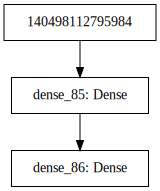

In [521]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [522]:
# Get layer size.
layer_size = []
for layer in model.layers:
    layer_size.append(int(layer.get_output_at(0).shape[1]))
layer_size.pop()
print(layer_size)

[3]


Finally we can visualise the network (without biases).

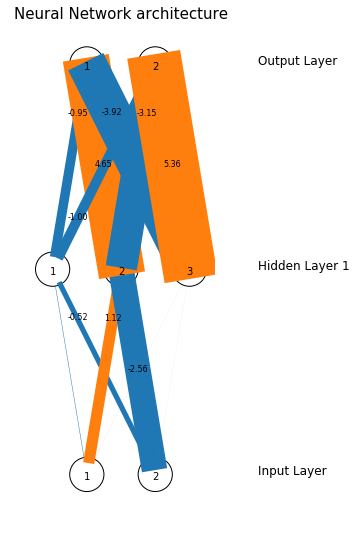

In [523]:
# Draw the Neural Network with weights
network_structure = np.hstack(([X.shape[1]], np.asarray(layer_size), [y_shape]))
weights = []
for i in range(0, len(model.get_weights())):
    if "bias" not in model.weights[i].name:
        weights.append(model.get_weights()[i])
network = VisNN.DrawNN(network_structure, weights)
network.draw()

We can also inspect the weight values of the network.

In [ ]:
model.get_weights()

Finally we can verify that the network is working as expected by placing in some values.

In [524]:
test = np.array([[25, 25]])
print('true: 0, predicted:' + str(model.predict_classes(test)))
test = np.array([[100, 100]])
print('true: 1, predicted:' + str(model.predict_classes(test)))
test = np.array([[50, 50]])
print('true: 1/0, predicted:' + str(model.predict_classes(test)))
test = np.array([[60, 60]])
print('true: 1, predicted:' + str(model.predict_classes(test)))

true: 0, predicted:[0]
true: 1, predicted:[1]
true: 1/0, predicted:[0]
true: 1, predicted:[1]
